In [199]:
!where python

C:\Users\1isad\anaconda3\python.exe
C:\Users\1isad\AppData\Local\Microsoft\WindowsApps\python.exe


In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
import dmba 
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [177]:
df = pd.read_csv("Downloads/D600 Task 1 Dataset 1 Housing Information.csv")
print(df) # There are 7000 records

        ID        Price  SquareFootage  NumBathrooms  NumBedrooms  \
0     4922  255614.8992         566.62      1.000000            4   
1     5009  155586.0947        1472.34      1.000000            2   
2     4450  131050.8324         550.00      1.779354            3   
3     1070  151361.7125         941.81      2.035254            2   
4      400  113167.6128         550.00      1.064644            3   
...    ...          ...            ...           ...          ...   
6995  6987  307821.1758         550.00      2.111022            4   
6996  6995  421368.8869        1726.12      4.056115            2   
6997  6996  473382.5348        1026.36      2.077177            5   
6998  6998  343397.9756        2218.22      1.000000            4   
6999  7000  438060.8193        1553.57      3.988377            4   

      BackyardSpace  CrimeRate  SchoolRating  AgeOfHome  DistanceToCityCenter  \
0            779.42      20.56          5.62      39.46                 10.08   
1        

In [179]:
df.describe()

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,EmploymentRate,PropertyTaxRate,RenovationQuality,LocalAmenities,TransportAccess,Floors,Windows,PreviousSalePrice,IsLuxury
count,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000,7.000000e+03,7000.00000
mean,3500.500000,3.072820e+05,1048.947459,2.131397,3.008571,511.507029,31.226194,6.942923,46.797046,17.475337,93.711349,1.500437,5.003357,5.934579,5.983860,1.16300,16.248857,2.845094e+05,0.50400
std,2020.870275,1.501734e+05,426.010482,0.952561,1.021940,279.926549,18.025327,1.888148,31.779701,12.024985,4.505359,0.498591,1.970428,2.657930,1.953974,0.37209,8.926479,1.857340e+05,0.50002
min,1.000000,8.500000e+04,550.000000,1.000000,1.000000,0.390000,0.030000,0.220000,0.010000,0.000000,72.050000,0.010000,0.010000,0.000000,0.010000,1.00000,-6.000000,-8.356902e+03,0.00000
25%,1750.750000,1.921075e+05,660.815000,1.290539,2.000000,300.995000,17.390000,5.650000,20.755000,7.827500,90.620000,1.160000,3.660000,4.000000,4.680000,1.00000,11.000000,1.420140e+05,0.00000
50%,3500.500000,2.793230e+05,996.320000,1.997774,3.000000,495.965000,30.385000,7.010000,42.620000,15.625000,94.010000,1.490000,5.020000,6.040000,6.000000,1.00000,15.000000,2.621831e+05,1.00000
75%,5250.250000,3.918781e+05,1342.292500,2.763997,4.000000,704.012500,43.670000,8.360000,67.232500,25.222500,97.410000,1.840000,6.350000,8.050000,7.350000,1.00000,20.000000,3.961212e+05,1.00000
max,7000.000000,1.046676e+06,2874.700000,5.807239,7.000000,1631.360000,99.730000,10.000000,178.680000,65.200000,99.900000,3.360000,10.000000,10.000000,10.000000,3.00000,63.000000,1.296607e+06,1.00000


In [181]:
# Identifying Predictors For Model

Predictors = ['SquareFootage', 'NumBathrooms',
              'NumBedrooms', 'AgeOfHome', 'Floors', 'Windows']
outcome = 'Price'

# Partitioning Data

X = pd.get_dummies(df[Predictors], drop_first=True)
y=df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

df_lr = LinearRegression()
df_lr.fit(train_X, train_y)

# Printing Coefficients from Training Set
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': df_lr.coef_}))

# Showcasing Performance Measures (for training)
regressionSummary(train_y, df_lr.predict(train_X))

       Predictor   coefficient
0  SquareFootage    162.588503
1   NumBathrooms  56097.962309
2    NumBedrooms  57051.541719
3      AgeOfHome   -214.771307
4         Floors   3729.804907
5        Windows    157.106001

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 96606.7398
            Mean Absolute Error (MAE) : 76093.0919
          Mean Percentage Error (MPE) : -9.5500
Mean Absolute Percentage Error (MAPE) : 28.4814


In [193]:
#Forward Stepwise
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, 
                                 verbose=True)
print(best_variables)
# Specify the relevant predictors
relevant_predictors = ['SquareFootage', 'NumBedrooms', 'NumBathrooms', 'AgeOfHome', 'Windows']
# Filter train_X to only include the relevant predictors
train_X_filtered = train_X[relevant_predictors]
#Summary information from training
predicted_values = best_model.predict(train_X_filtered[best_variables])
mse = mean_squared_error(train_y, predicted_values)
print(mse)
regressionSummary(train_y, best_model.predict(train_X_filtered[best_variables]))

Variables: SquareFootage, NumBathrooms, NumBedrooms, AgeOfHome, Floors, Windows
Start: score=112148.24, constant
Step: score=110629.33, add SquareFootage
Step: score=109467.68, add NumBedrooms
Step: score=108371.19, add NumBathrooms
Step: score=108352.46, add AgeOfHome
Step: score=108352.24, add Windows
Step: score=108352.24, unchanged None
['SquareFootage', 'NumBedrooms', 'NumBathrooms', 'AgeOfHome', 'Windows']
9334107180.28321

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 96613.1833
            Mean Absolute Error (MAE) : 76105.7446
          Mean Percentage Error (MPE) : -9.5484
Mean Absolute Percentage Error (MAPE) : 28.4827


In [185]:
#Tested regression

#Limiting the predictors
valid_X_filtered = valid_X[relevant_predictors]

predicted_test = best_model.predict(valid_X_filtered[best_variables])

test_mse = mean_squared_error(valid_y, predicted_test)
print(test_mse)

regressionSummary(valid_y, best_model.predict(valid_X_filtered[best_variables]))


9083457930.141212

Regression statistics

                      Mean Error (ME) : -1314.7815
       Root Mean Squared Error (RMSE) : 95307.1767
            Mean Absolute Error (MAE) : 75486.6946
          Mean Percentage Error (MPE) : -9.9435
Mean Absolute Percentage Error (MAPE) : 28.6988


In [191]:
#Train Set Model Performance

# Combine the filtered predictors with train_y
train_df = train_X_filtered.join(train_y)

# Create the formula for regression
formula = 'Price ~ ' + ' + '.join(relevant_predictors)

# Fit the regression model
housetrain_lm = sm.ols(formula=formula, data=train_df).fit()

# Display the summary of the model
print(housetrain_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     1237.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:46:26   Log-Likelihood:                -54169.
No. Observations:                4200   AIC:                         1.084e+05
Df Residuals:                    4194   BIC:                         1.084e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.479e+05   7404.878    -19.977

In [189]:
#Test (Validate) Set Model Performance

# Combine the filtered predictors with train_y
valid_df = valid_X_filtered.join(valid_y)

# Create the formula for regression
formula = 'Price ~ ' + ' + '.join(relevant_predictors)

# Fit the regression model
house_lm = sm.ols(formula=formula, data=valid_df).fit()

# Display the summary of the model
print(house_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     782.9
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:30:25   Log-Likelihood:                -36069.
No. Observations:                2800   AIC:                         7.215e+04
Df Residuals:                    2794   BIC:                         7.218e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.307e+05   8941.040    -14.616

In [ ]:
# Visualizations

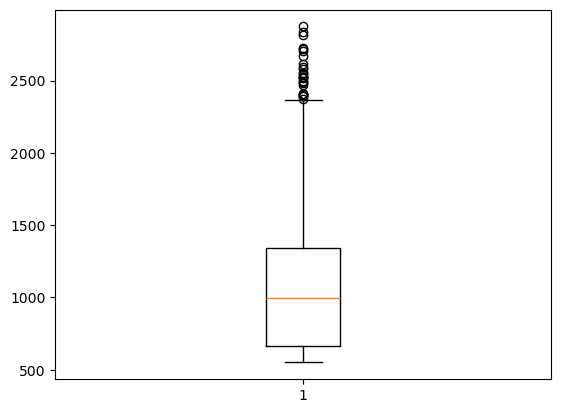

In [75]:
# SquareFootage Boxplot
data=df['SquareFootage']
plt.boxplot(data)
plt.show()

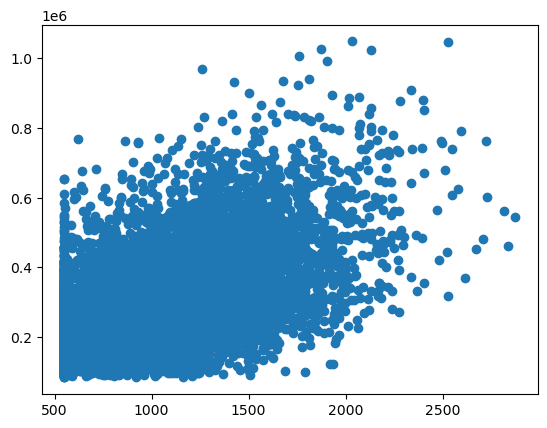

In [83]:
#SquareFootage Scatter
plt.scatter(df['SquareFootage'], df['Price'])

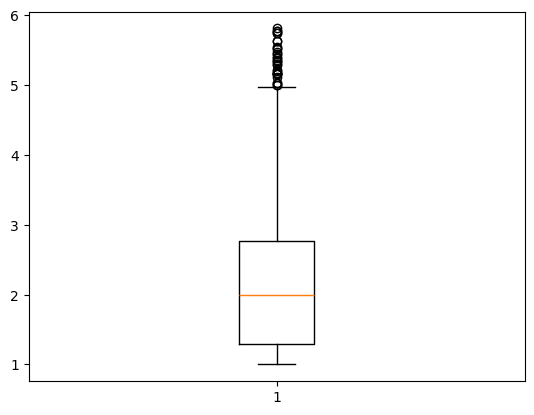

In [79]:
# NumBathrooms Boxplot
data=df['NumBathrooms']
plt.boxplot(data)
plt.show()


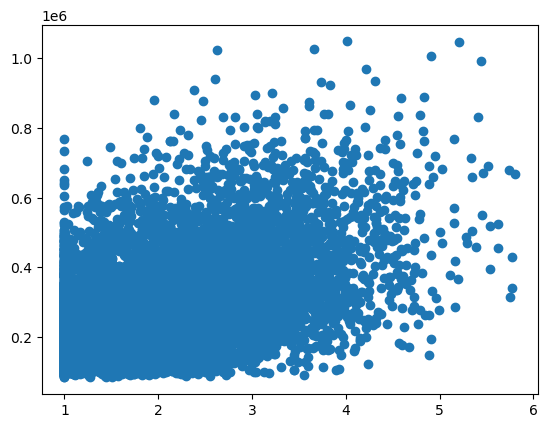

In [85]:
#Numbathrooms Scatterplot
plt.scatter(df['NumBathrooms'], df['Price'])

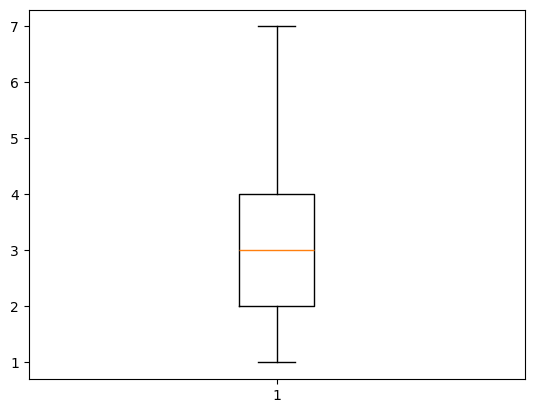

In [39]:
# NumBedrooms Boxplot
data=df['NumBedrooms']
plt.boxplot(data)
plt.show()


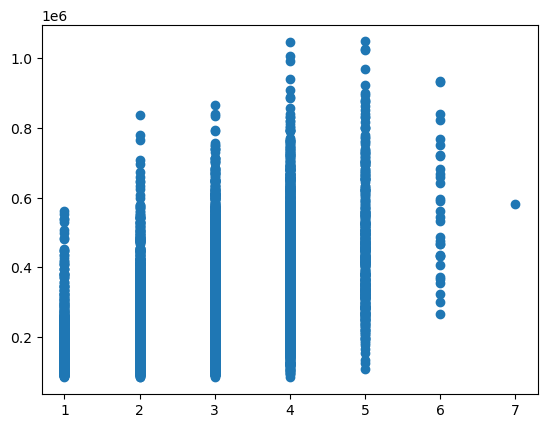

In [93]:
plt.scatter(df['NumBedrooms'], df['Price'])

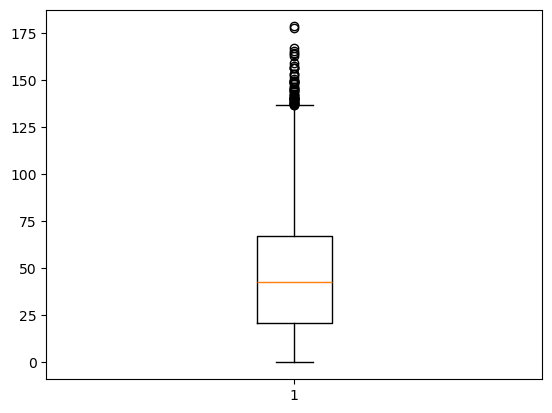

In [41]:
# AgeOfHome Boxplot
data=df['AgeOfHome']
plt.boxplot(data)
plt.show()


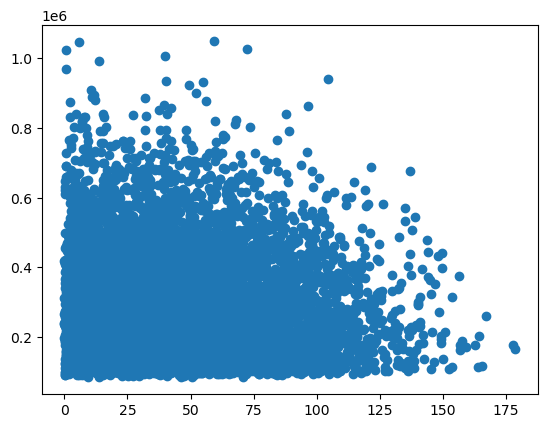

In [91]:
plt.scatter(df['AgeOfHome'], df['Price'])

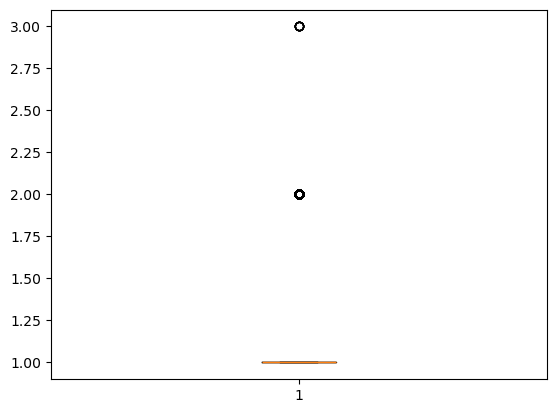

In [43]:
# Floors Boxplot
data=df['Floors']
plt.boxplot(data)
plt.show()


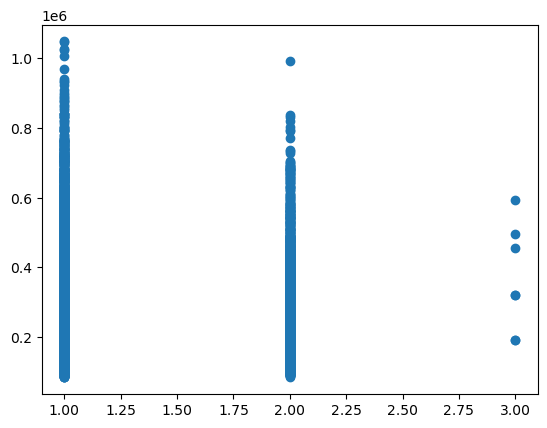

In [89]:
#Floors Scatterplot
plt.scatter(df['Floors'], df['Price'])

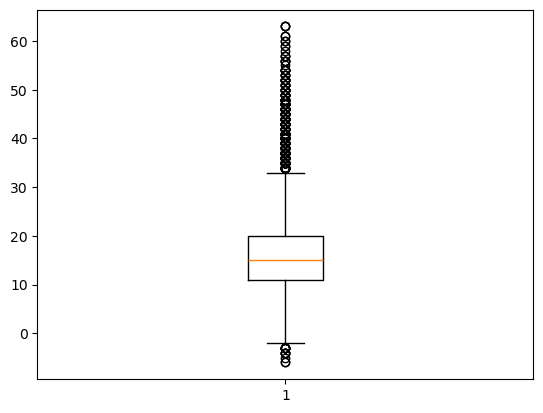

In [45]:
# Windows Boxplot
data=df['Windows']
plt.boxplot(data)
plt.show()


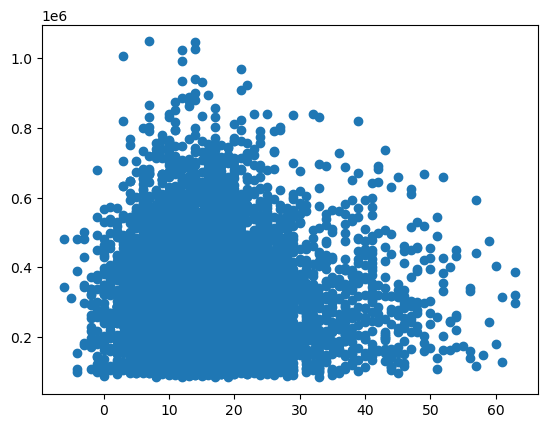

In [87]:
#Windows Scatterplot
plt.scatter(df['Windows'], df['Price'])

In [ ]:
# Data Analysis